In [25]:
import numpy as np 
import pandas as pd 
from nltk.corpus import stopwords
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from warnings import simplefilter
from sklearn.linear_model import LogisticRegression
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anukriti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anukriti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
train_data=pd.read_csv("C:/Users/Anukriti/Downloads/train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("C:/Users/Anukriti/Downloads/test.csv",header=0,names=['classid','title','desc'])

In [3]:
train_data.head()

,classid,title,desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
test_data.head()

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [5]:
train_x=train_data.desc[:60000]
test_x=test_data.desc
train_y=train_data.classid[:60000]
test_y=test_data.classid

<AxesSubplot:ylabel='count'>

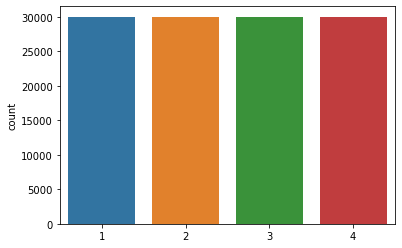

In [6]:
sns.countplot(x = train_data.classid.values)

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anukriti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
train_x=train_x.apply(nltk.word_tokenize)
test_x=test_x.apply(nltk.word_tokenize)

In [9]:
def lowercasing(lst):
    lst = [val.lower() for val in lst]
    return lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)

In [10]:
def remove_punctuations(lst):
    lst = [val for val in lst if(val.isalpha())]
    return lst
train_x=train_x.apply(remove_punctuations) 
test_x=test_x.apply(remove_punctuations)

In [11]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    lst=[val for val in lst if val not in stop]
    return lst
train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords)  

In [12]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    return [lemmatizer.lemmatize(val) for val in lst]
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [13]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [14]:
tfidf=TfidfVectorizer(max_features=10000,min_df=6)
train_arr=tfidf.fit_transform(train_x)
test_arr=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names()))
print(tfidf.get_feature_names()[:20])

No. of features extracted
10000
['aapl', 'aaron', 'ab', 'ababa', 'abandon', 'abandoned', 'abandoning', 'abbas', 'abbey', 'abbott', 'abby', 'abc', 'abdication', 'abducted', 'abduction', 'abductor', 'abdul', 'abdullah', 'ability', 'ablaze']


In [15]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

In [16]:
#Defining Logistic Regression Model
model11 = LogisticRegression(max_iter=10000,C=5.0,solver='newton-cg')
estimators.append(('logistic1', model11))

In [17]:
#Defining Decision Tree Classifier
model16 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model16))

In [18]:
#Defining Support Vector Classifier
model21 = SVC(kernel = 'linear')
estimators.append(('svm1', model21))

In [19]:
#Defining K-NN classifier
model26 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn1', model26))

In [22]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(train_arr,train_y)
y_pred = ensemble.predict(test_arr)

In [23]:
cm_HybridEnsembler = confusion_matrix(test_y, y_pred)

In [28]:
ensemble.score(test_arr,test_y)

0.8746052631578948